# Python for deep learning

In [26]:
import os
if  not os.path.isdir('./training'):
  !cd /content/ && git clone https://github.com/MontpellierRessourcesImagerie/DL_EXP_PC.git && cp -r DL_EXP_PC/data . && cp -r DL_EXP_PC/training .
  %cd DL_EXP_PC

## Cell 4

Cell 4 ceates a list of all coordinates of pixels belonging to objects and another list of all coordiantes of pixels belonging to the background.

```python
import numpy as np
foregroundY, foregroundX = gtImage.nonzero()
foreground = list(zip(foregroundY, foregroundX))
backgroundY, backgroundX = (gtImage==0).nonzero()
background = list(zip(backgroundY, backgroundX))
print(background[0:10], "nr.:", len(background))
print(foreground[0:10], "nr.:", len(foreground))
```

## Numpy n-dimensional arrays as images

In [1]:
import numpy as np

We import the module numpy and give it the local name np. numpy provides support for n-dimensional arrays. The tifffile module loaded the images as numpy arrays. For demonstration purposes we will use a smaller arrays instead of the ground-truth image here.

In [2]:
gtImage = np.random.randint(0,4,size=(6, 10))
print(gtImage)

[[0 1 3 3 1 0 0 3 3 3]
 [1 2 2 3 2 1 2 2 3 1]
 [3 1 1 0 2 3 1 2 1 3]
 [1 2 2 3 2 3 0 0 1 2]
 [1 3 0 0 3 1 2 1 2 0]
 [2 1 3 2 0 0 3 3 3 0]]


Note that to access elements, numpy arrays use the row, column convention; i.e. the first index selects the row and the second index the column. This can be confusing when working with images for which often the geometrical convetion, i.e. first x then y is used.

In [3]:
print(gtImage[5, 9])

0


To create a displayable image from the numpy-array we use the Python Imaging Library (PIL). We also import the function display from the submodule display of the module IPython.

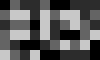

In [4]:
from PIL import Image              
from IPython.display import display 
im = Image.fromarray(np.uint8(gtImage)*100)
im = im.resize((100, 60), Image.NONE)
display(im)

Our real grount-truth image is an indexed mask, in which all pixels belonging to the same object have the same value, which corresponds to the index of the object. Here the values are random and pixels with the same value are not necessarily connected, but it doesn't matter for our demonstration.

## Lists and tupels

Besides numpy arrays we now need two more data-structures: lists and tupels. 

Lists and tupels are similar. Both store values in a specific order. The difference is, that lists can be modified after their creation while tupels can not. We say that lists are mutable while tupels are immutable. In our notebook we use tupel to represent the coordinates of pixels (y, x). We use lists to store multiple coordinates, for example the coordinates of all foreground pixels.

### Tupel

Tupels can be used to represent points or vectors, as long as we do not want to modify elements of the points or vectors.

In [5]:
from math import sqrt
p1 = 10, 3
p2 = 5, 4
d = sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
print("The distance between", p1, "and", p2, "is", d)

The distance between (10, 3) and (5, 4) is 5.0990195135927845


We can also use a tupel of variables on the left side of an assignment.

In [6]:
x1, y1 = p1
print("x1", "=", x1)
print("y1", "=", y1)

x1 = 10
y1 = 3


We only use tupels of length 2 here, however, as lists, tupels can have any length.

In [7]:
squares = 1, 2, 4, 9, 16, 25
length = len(squares)
print(length)

6


We can iterate over the elements of a tupel using a loop.

In [8]:
for square in squares:
    print(square)

1
2
4
9
16
25


Once created, the elements of a tupel can not be modified. However a new tupel can of course be calculated from an existing one.

In [9]:
squares[0] = 2

TypeError: 'tuple' object does not support item assignment

In [10]:
t_xy = 1, 3
t_yx = t_xy[1], t_xy[0]
print(t_xy)
print(t_yx)

(1, 3)
(3, 1)


## Lists

The content of a list can be modified after its creation.

In [11]:
numbers = [1, 3, 3, 4, 5]
numbers[1] = 2
print(numbers)

[1, 2, 3, 4, 5]


We can convert tupels or other iterables data structures to a list using the ```list()``` function.

In [12]:
numbers = 1, 2, 3, 4, 5
print(numbers)
listOfNumbers = list(numbers)
print(listOfNumbers)

(1, 2, 3, 4, 5)
[1, 2, 3, 4, 5]


The zip function takes two lists of the same length and creates an iterable of tupels of the elements at the same positions in the two lists.  

In [13]:
list1 = [1, 3, 5, 7]
list2 = [2, 4, 6, 8]
zipped = zip(list1, list2)
for t in zipped:
    print(t)

(1, 2)
(3, 4)
(5, 6)
(7, 8)


We can convert the iterable to a list.

In [14]:
zipped = list(zip(list1, list2))
print(zipped)

[(1, 2), (3, 4), (5, 6), (7, 8)]


## Numpy arrays

We will retrieve the coordinates of all foreground and background pixels.

We can create a new array from a given array by appling operations or condition on each element of an array

We can for example use it to threshold an image.

In [15]:
print(gtImage)
(gtImage>2)*255

[[0 1 3 3 1 0 0 3 3 3]
 [1 2 2 3 2 1 2 2 3 1]
 [3 1 1 0 2 3 1 2 1 3]
 [1 2 2 3 2 3 0 0 1 2]
 [1 3 0 0 3 1 2 1 2 0]
 [2 1 3 2 0 0 3 3 3 0]]


array([[  0,   0, 255, 255,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255,   0,   0,   0,   0, 255,   0],
       [255,   0,   0,   0,   0, 255,   0,   0,   0, 255],
       [  0,   0,   0, 255,   0, 255,   0,   0,   0,   0],
       [  0, 255,   0,   0, 255,   0,   0,   0,   0,   0],
       [  0,   0, 255,   0,   0,   0, 255, 255, 255,   0]])

We can get the indices of all elements different from zero using the nonzero function of numpy. The function returns a tupel of arrays, where the first element is a list of the y-coordinates and the second a list of the x-coordinates.

In [16]:
gtImage.nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
        5, 5, 5, 5]),
 array([1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 8, 9, 0, 1, 4, 5, 6, 7, 8, 0, 1, 2,
        3, 6, 7, 8]))

To check the result we display the image again.

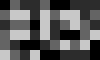

In [17]:
display(im)

We get the two lists and zip them to get one list of tupels, where the tupels represent the coordinates (y, x).

In [18]:
foregroundY, foregroundX = gtImage.nonzero()
foreground = list(zip(foregroundY, foregroundX))
print(foreground)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 8), (3, 9), (4, 0), (4, 1), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 6), (5, 7), (5, 8)]


To get the coordinates of the background pixels, we first transform the image into an array containing True (which is also 1) for all pixels that are zero and False (which is also 0) for all pixels different from zero. We then apply nonzero to the transformed array.

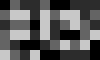

In [19]:
display(im)

In [20]:
(gtImage==0) * 1

array([[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1]])

In [21]:
backgroundY, backgroundX = (gtImage==0).nonzero()
background = list(zip(backgroundY, backgroundX))
print(background)

[(0, 0), (0, 5), (0, 6), (2, 3), (3, 6), (3, 7), (4, 2), (4, 3), (4, 9), (5, 4), (5, 5), (5, 9)]


We can extract a subset of a list by using the :-operator when indexing the list. This is called slicing.

In [25]:
background[1:3]

[(0, 5), (0, 6)]

When slicing the first number is the start index and the second the end index. The element at the end-index index is not part of the result, i.e. ``a[b:c]`` returns a list containing the elements from index b to index c-1 of a.

An optional third parameter can be used to define a step-size. It can also be negative to go from the end to the start. The start and end index can also be left out which means from the start of to the end of the list.

In [23]:
background[::-2]

[(5, 9), (5, 4), (4, 3), (3, 7), (2, 3), (0, 5)]